In [9]:
#DATA FROM https://www.kaggle.com/ntnu-testimon/paysim1
import pandas as pd
import numpy as np
from sklearn.cluster import OPTICS
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
datos=pd.read_csv("C:/Users/80214178/Documents/Fraud Detection/PS_20174392719_1491204439457_log.csv")
datos.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
datos.shape

(6362620, 11)

In [4]:
datos=datos.drop(columns=['nameOrig','nameDest','isFlaggedFraud','isFraud'])
datos.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0


In [5]:
data=pd.concat([datos.drop(columns=['type']), pd.get_dummies(datos['type'])], axis=1)
data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [ ]:
#Optics
#optics_model = OPTICS(min_samples = 100) 
#optics_model.fit(data)



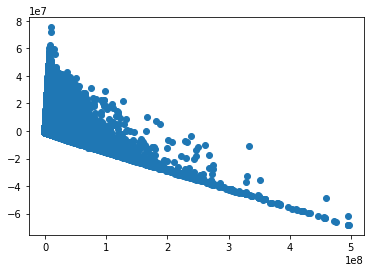

In [10]:
# Defining the framework of the visualization 

#Compute PCA for visualization
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(data)

#colors = ['black', 'green','red','gray','blue','yellow','pink','orange']

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]

#Optics
plt.scatter(x_axis, y_axis)
#ax4.set_title('Optics, min_samples=10')